# アヤメの分類
Week3で使用したirisデータセットを使い、分類問題を解く練習をします。

irisデータセットはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータでした。

* Iris setosa - Wikipedia
* Iris virgicolor - Wikipedia
* Iris virginica - Wikipedia


4種類の特徴量（説明変数）からアヤメの種類を推測する問題が設定できます。アヤメの種類を 分類 するので、こういったものを分類問題と呼びます。



## 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

* 最近傍法
* ロジスティック回帰
* SVM
* 決定木
* ランダムフォレスト

# 分類問題の流れ
まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。課題の後半ではこれを参考に他の手法にも適用してもらいます。

この流れについては後々より深く学び、実践していきます。今回の課題では大まかな流れの把握を行ってください。



## 練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。こうすることで2次元の散布図を描き確認することができます。また、問題を単純化するためアヤメの種類を2つだけ使うことにします。分類対象が2種類の場合を 2値分類 と呼び、それ以上の 多値分類 とは区別をします。それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。



## 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

* virgicolorとvirginica
* sepal_lengthとpetal_length






### 【課題1】解答


In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris() # データセット読込
print(iris.keys())
print(iris.feature_names)
print(iris.target_names)
print(iris.data.shape) # データセットのshape

X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.columns = ['sepal_length','sepal_width','petal_length','petal_width']
y = pd.DataFrame(iris.target)
y.columns = ['Spicies']

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)


In [2]:
# versicolor & virginica, sepal_length & petal_length
X = X.iloc[50:,[0,2]]
y = y[50:]

**《実際の問題では？》**

実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

## 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

### 【課題2】解答


In [3]:
X.iloc[0:49,0].shape, X.iloc[50:99,0].shape

((49,), (49,))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1e48c0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1e48cb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1e47b350>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1e496590>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1e496a90>,
 'means': []}

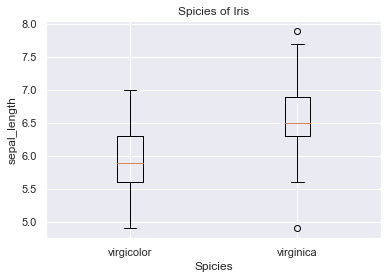

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ラベルごとのデータのリスト化
data = [X.iloc[0:49,0], X.iloc[50:99,0]] 

# 箱ひげ図を描画
sns.set()
plt.title('Spicies of Iris')
plt.xlabel('Spicies')
plt.ylabel('sepal_length')
# plt.ylim(0, 10)
display(plt.boxplot(data, labels=['virgicolor','virginica']))



{'bodies': [<matplotlib.collections.PolyCollection at 0x1a1e4f3c10>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a1dbdd850>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a1e5e1610>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a1e5e1310>}

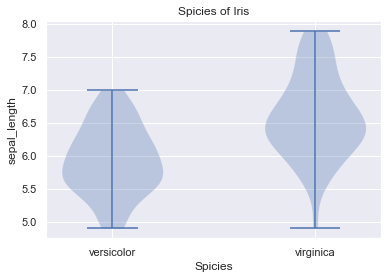

In [5]:
# 箱ひげ図を描画
sns.set()
plt.title('Spicies of Iris')
plt.xlabel('Spicies')
plt.ylabel('sepal_length')
plt.xticks([1, 2], iris.target_names[1:])

data = [X.iloc[0:49,0], X.iloc[50:99,0]] 

# plt.ylim(0, 10)
display(plt.violinplot(data))

**《実際の問題では？》**

このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。

今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

前処理
データに加工をしていきます。


## 【問題3】前処理・訓練用データと検証用データの分割
前処理の一貫として、訓練用（train）データと検証用（validation）データの分割を行います。今回は訓練用データ75%、検証用データ25%として分割してください。

scikit-learnの`train_test_split`が利用できます。公式ドキュメントのExamplesを参考に動かしてください。

[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

**《注意点》**

データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

**《分割する理由》**

分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練用データ、検証に使うデータが検証用データで、一般的に7対3から8対2程度の割合にします。

### 【課題３】解答


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

# ndarrayに変換
X, y = X.values, y.values

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
type(X_train), X_train.shape

(numpy.ndarray, (75, 2))

## 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

**標準化**を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

**《注意点》**

標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証用データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。

**《実際の問題での前処理は？》**

アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

### 【課題4】解答


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
# print(scaler.mean_)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

[[ 0.62124015 -0.65893772]
 [-1.15373171 -0.65893772]
 [ 0.02958286  0.05557306]
 [-1.59747467 -1.25436337]
 [ 2.10038336  2.08002027]
 [-0.56207442 -0.89710798]
 [-0.11833146 -0.77802285]
 [ 2.10038336  1.36550949]
 [-0.4141601  -0.53985259]
 [ 0.76915447  1.12733923]
 [-0.85790306 -0.53985259]
 [ 0.32541151  0.65099871]
 [ 0.17749719  0.41282845]
 [-0.4141601  -0.53985259]
 [-1.00581738 -0.53985259]
 [-0.85790306 -1.01619311]
 [-1.30164603 -0.53985259]
 [-2.04121763 -1.96887414]
 [ 0.62124015  0.29374332]
 [ 0.62124015  0.05557306]
 [-1.00581738 -1.25436337]
 [ 2.396212    1.72276488]
 [ 0.47332583 -0.65893772]
 [ 0.76915447  0.65099871]
 [-0.26624578 -0.30168233]
 [ 0.17749719 -0.77802285]
 [-1.15373171 -1.13527824]
 [-0.70998874 -1.01619311]
 [-1.00581738 -1.01619311]
 [ 0.47332583 -0.42076746]
 [ 0.17749719  0.77008384]
 [ 0.02958286 -0.30168233]
 [-0.70998874  0.17465819]
 [ 0.62124015 -0.30168233]
 [ 0.91706879  0.53191358]
 [-2.04121763 -0.53985259]
 [-0.56207442  0.17465819]
 

## 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練用データです。

[sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

学習が終わった後、検証用データを`predict`メソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、`n_neighbors`の数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を`5-nn`、3の場合を`3-nn`のように呼びます。




### 【課題5】解答


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_std, np.ravel(y_train)) # np.ravelで1次元配列にする
# knn.score(X_test, y_test)
y_pred1 = knn1.predict(X_test_std)
print(accuracy_score(y_test, y_pred1))

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_std, np.ravel(y_train)) # np.ravelで1次元配列にする
# knn.score(X_test, y_test)
y_pred3 = knn3.predict(X_test_std)
print(accuracy_score(y_test, y_pred3))

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_std, np.ravel(y_train)) # np.ravelで1次元配列にする
# knn.score(X_test, y_test)
y_pred5 = knn5.predict(X_test_std)
print(accuracy_score(y_test, y_pred5))

print(y_pred1)
print(y_pred3)
print(y_pred5)

0.8
0.8
0.8
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]


## 【問題6】評価
検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には **Accuracy（正解率）**、**Precision（適合率）**、**Recall（再現率）**、**F値** があります。それぞれの意味を理解するには、 **混同行列（confusion matrix）** を見ることになります。

* scikit-learnを使い4種類の指標を計算する
* 混同行列をscikit-learnを使い表示する
* 4種類の指標値の意味について簡単に調査して文章でまとめる


[sklearn.metrics.accuracy_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[sklearn.metrics.precision_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

[sklearn.metrics.recall_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

[sklearn.metrics.f1_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

[sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)



### 【課題6】解答

In [10]:
# Accuracy（正解率) 
from sklearn.metrics import accuracy_score
y_pred = [0, 0, 1, 1]
y_true = [0, 1, 0, 0]

accuracy_rate = accuracy_score(y_true, y_pred) # 正解率
print('正解率：{}%'.format(accuracy_rate*100))
n_accuracy = accuracy_score(y_true, y_pred, normalize=False) # 正解数
print('正解数：{}個'.format(n_accuracy))

正解率：25.0%
正解数：1個


In [11]:
# Precision（適合率）
from sklearn.metrics import precision_score

# 二値分類
y_true = [0, 1, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1]

precision_rate = precision_score(y_true, y_pred) 
print('適合率：1/1 = {:.1f}%'.format(precision_rate*100))

precision_rate = precision_score(y_true, y_pred, pos_label=0)
print('適合率：1/4 = {:.1f}%'.format(precision_rate*100))


# 多クラス分類
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 2]

precision_rate_macro = precision_score(y_true, y_pred, average='macro') # 各クラスの適合率／クラス数
print('適合率（マクロ平均）：( (2/3) + (0/1) + (1/2) )/3 = {:.1f}%'.format(precision_rate_macro*100))

precision_rate_weighted = precision_score(y_true, y_pred, average='weighted') # 各クラスの適合率＊各クラスのtrueの個数／全個数
print('適合率（重み付き平均）：( (2/3*2) + (0/1*2) + (1/2*2) )/6 = {:.1f}%'.format(precision_rate_weighted*100))

precision_rate_micro = precision_score(y_true, y_pred, average='micro') # 全適合数／全個数
print('適合率（マイクロ平均）：(2 + 0 + 1)/6 = {:.1f}%'.format(precision_rate_micro*100))

適合率：1/1 = 100.0%
適合率：1/4 = 25.0%
適合率（マクロ平均）：( (2/3) + (0/1) + (1/2) )/3 = 38.9%
適合率（重み付き平均）：( (2/3*2) + (0/1*2) + (1/2*2) )/6 = 38.9%
適合率（マイクロ平均）：(2 + 0 + 1)/6 = 50.0%


#### scikit-learnを使い4種類の指標を計算する

In [12]:
# Recall（再現率）
from sklearn.metrics import recall_score

# 二値分類
y_true = [0, 1, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1]

recall_rate = recall_score(y_true, y_pred) 
print('再現率：1/4 = {:.1f}%'.format(recall_rate*100))

recall_rate = recall_score(y_true, y_pred, pos_label=0)
print('再現率：1/1 = {:.1f}%'.format(recall_rate*100))


# 多クラス分類
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 2]

recall_rate_macro = recall_score(y_true, y_pred, average='macro') # 各クラスの再現率／クラス数
print('再現率（マクロ平均）：( (2/2) + (0/2) + (1/2) )/3 = {:.1f}%'.format(recall_rate_macro*100))

recall_rate_weighted = recall_score(y_true, y_pred, average='weighted') # 各クラスの再現率＊各クラスのtrueの個数／全個数
print('再現率（重み付き平均）：( (2/2*2) + (0/2*2) + (1/2*2) )/6 = {:.1f}%'.format(recall_rate_weighted*100))

recall_rate_micro = recall_score(y_true, y_pred, average='micro') # 全再現数／全個数
print('再現率（マイクロ平均）：(2 + 0 + 1)/6 = {:.1f}%'.format(recall_rate_micro*100))

再現率：1/4 = 25.0%
再現率：1/1 = 100.0%
再現率（マクロ平均）：( (2/2) + (0/2) + (1/2) )/3 = 50.0%
再現率（重み付き平均）：( (2/2*2) + (0/2*2) + (1/2*2) )/6 = 50.0%
再現率（マイクロ平均）：(2 + 0 + 1)/6 = 50.0%


In [13]:
# F-measure, F-score（F値）
from sklearn.metrics import f1_score

# 二値分類
y_true = [0, 1, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1]

f1_score_rate = f1_score(y_true, y_pred) 
print('F値：( 2*(1/1*1/4) )/(1/1 + 1/4) = {:.1f}%'.format(f1_score_rate*100))

f1_score_rate = f1_score(y_true, y_pred, pos_label=0)
print('F値：( 2*(1/4*1/2) )/(1/4 + 1/1) = {:.1f}%'.format(f1_score_rate*100))


# 多クラス分類
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 2]

f1_score_rate_macro = f1_score(y_true, y_pred, average='macro') # 各クラスのF値／クラス数
print('F値（マクロ平均）： (2*precision_rate_macro*recall_rate_macro)/(precision_rate_macro+recall_rate_macro) = {:.1f}%'.format(f1_score_rate_macro*100))
f1_score_rate_weighted = f1_score(y_true, y_pred, average='weighted') # 各クラスのF値＊各クラスのtrueの個数／全個数
print('F値（重み付き平均）： (2*precision_rate_weighted*recall_rate_weighted)/(precision_rate_weighted+recall_rate_weighted) = {:.1f}%'.format(f1_score_rate_weighted*100))

f1_score_rate_micro = f1_score(y_true, y_pred, average='micro') # 全再現数／全個数
print('F値（マイクロ平均）： (2*precision_rate_micro*recall_rate_micro)/(precision_rate_micro+recall_rate_micro) = {:.1f}%'.format(f1_score_rate_micro*100))

F値：( 2*(1/1*1/4) )/(1/1 + 1/4) = 40.0%
F値：( 2*(1/4*1/2) )/(1/4 + 1/1) = 40.0%
F値（マクロ平均）： (2*precision_rate_macro*recall_rate_macro)/(precision_rate_macro+recall_rate_macro) = 43.3%
F値（重み付き平均）： (2*precision_rate_weighted*recall_rate_weighted)/(precision_rate_weighted+recall_rate_weighted) = 43.3%
F値（マイクロ平均）： (2*precision_rate_micro*recall_rate_micro)/(precision_rate_micro+recall_rate_micro) = 50.0%


#### 混同行列をscikit-learnを使い表示する

In [14]:
from sklearn.metrics import confusion_matrix

# 二値分類
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

cm = confusion_matrix(y_true, y_pred)
print(cm)

cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
print(cm)

# 多クラス分類
y_true_multi = [0, 0, 0, 1, 1, 1, 2, 2, 2]
y_pred_multi = [0, 1, 1, 1, 1, 2, 2, 2, 2]
print(confusion_matrix(y_true_multi, y_pred_multi))

[[1 4]
 [3 2]]
[[2 3]
 [4 1]]
[[1 2 0]
 [0 2 1]
 [0 0 3]]


#### 4種類の指標値の意味について簡単に調査して文章でまとめる

**Accuracy（正解率）**：すべてのサンプルのうち正解したサンプルの割合

**Precision（適合率）**
：陽性と予測されたサンプルのうち正解したサンプルの割合

**Recall（再現率）**：
実際に陽性のサンプルのうち正解したサンプルの割合

**F-measure, F-score（F値）**
：適合率と再現率の調和平均

## 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練用データまたは検証用データを与えます。

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

3-nnの決定領域を表示した例が以下です。

![代替テキスト](https://t.gyazo.com/teams/diveintocode/a40d4c5f7ec594f5c7ee9e1b58fab96b.png)

### 【課題7】解答


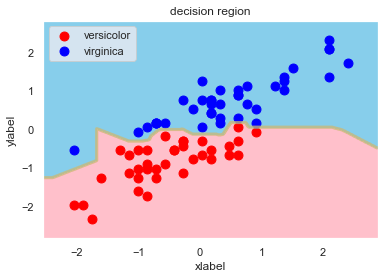

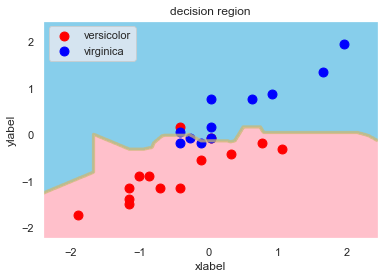

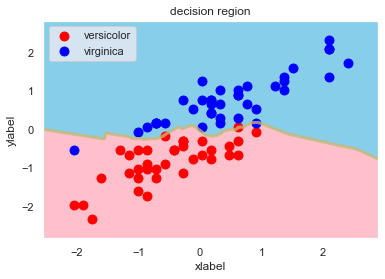

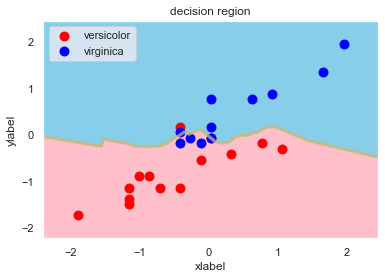

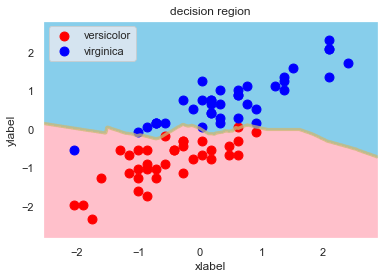

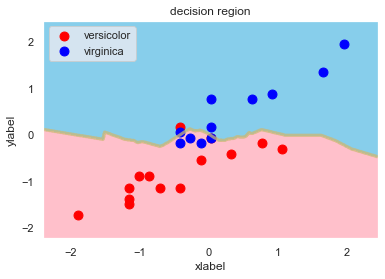

In [39]:
decision_region(X_train_std, np.ravel(y_train), knn1)
decision_region(X_test_std, np.ravel(y_test), knn1)

decision_region(X_train_std, np.ravel(y_train), knn3)
decision_region(X_test_std, np.ravel(y_test), knn3)

decision_region(X_train_std, np.ravel(y_train), knn5)
decision_region(X_test_std, np.ravel(y_test), knn5)

この例では訓練用データをプロットし、どのように学習したかを見ています。一方で、検証用データをプロットすればどういった特徴量のものが間違って分類されたかを見ることができます。

## 手法の改善
実際の問題では指標値や可視化を元に手法を改善していきますが、この課題では扱いません。

#各手法の比較
他の手法も基本的な流れは同様です。他の手法でも学習から可視化までを行っていきます。

# 各手法の比較

他の手法も基本的な流れは同様です。他の手法でも学習から可視化までを行っていきます。

## 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


* 最近傍法
* ロジスティック回帰
* SVM
* 決定木
* ランダムフォレスト


公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。


* [sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
* [sklearn.linear_model.LogisticRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [sklearn.svm.SVC — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* [sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
* [sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)


**《実際の問題では？》**


ハイパーパラメータの調整は **パラメータチューニング** と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。

LogisticRegression
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.82      0.82      0.82        11

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25



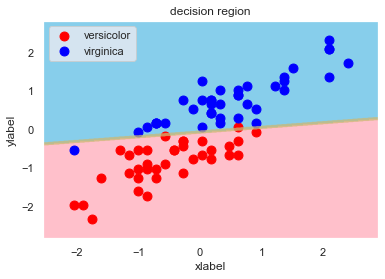

SVM
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.82      0.82      0.82        11

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25



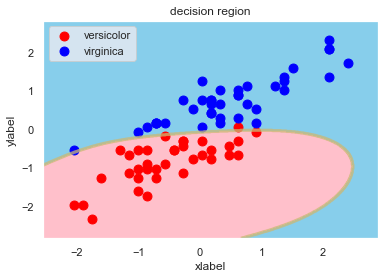

DecisionTree
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.82      0.82      0.82        11

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25



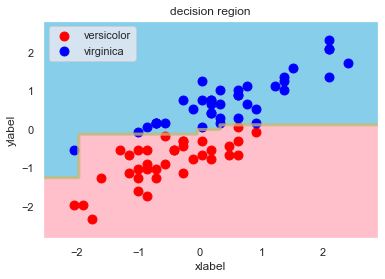

RandomForest
[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
              precision    recall  f1-score   support

           1       0.81      0.93      0.87        14
           2       0.89      0.73      0.80        11

    accuracy                           0.84        25
   macro avg       0.85      0.83      0.83        25
weighted avg       0.85      0.84      0.84        25



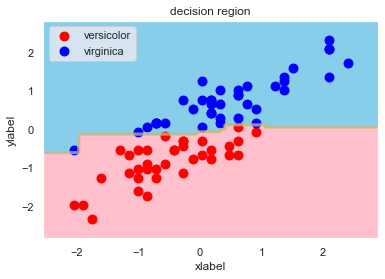

In [56]:
# sklearnのから各種モデルをimportする
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lg = LogisticRegression(solver='lbfgs')
lg.fit(X_train_std, np.ravel(y_train))
lg_pred = lg.predict(X_test_std)

svc = SVC()
svc.fit(X_train_std, np.ravel(y_train))
svc_pred = lg.predict(X_test_std)

dt = DecisionTreeClassifier()
dt.fit(X_train_std, np.ravel(y_train))
dt_pred = lg.predict(X_test_std)


from sklearn.metrics import classification_report



rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_std, np.ravel(y_train))
rf_pred = rf.predict(X_test_std)

print('LogisticRegression')
print(lg_pred)
print(classification_report(y_test, lg_pred))
decision_region(X_train_std, np.ravel(y_train), lg)

print('SVM')
print(svc_pred)
print(classification_report(y_test, svc_pred))
decision_region(X_train_std, np.ravel(y_train), svc)

print('DecisionTree')
print(dt_pred)
print(classification_report(y_test, dt_pred))
decision_region(X_train_std, np.ravel(y_train), dt)

print('RandomForest')
print(rf_pred)
print(classification_report(y_test, rf_pred))
decision_region(X_train_std, np.ravel(y_train), rf)